# Scatter Plots of Samples

In [14]:
from qmcpy import *
from copy import deepcopy
from numpy import ceil, linspace, meshgrid, zeros, array, arange, random
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

In [15]:
n = 128

## IID Samples

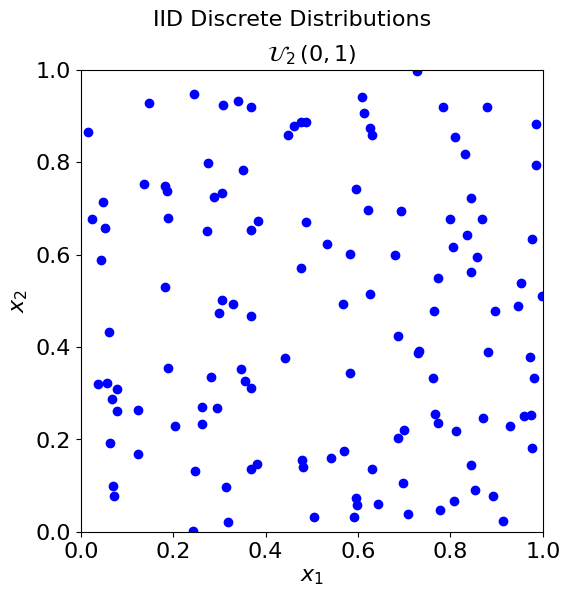

In [16]:
random.seed(7)
discrete_distribs = [
    IIDStdUniform(dimension=2, seed=7),
    #IIDStdGaussian(dimension=2, seed=7),
    #CustomIIDDistribution(lambda n: random.exponential(scale=2./3,size=(n,2)))
]
dd_names = ["$\\mathcal{U}_2\\,(0,1)$", "$\\mathcal{N}_2\\,(0,1)$", "Exp(1.5)"]
colors = ["b", "r", "g"]
lims = [[0, 1], [-2.5, 2.5],[0,4]]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
for i, (dd_obj, color, lim, dd_name) in enumerate(zip(discrete_distribs, colors, lims, dd_names)):
    samples = dd_obj.gen_samples(n)
    ax.scatter(samples[:, 0], samples[:, 1], color=color)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect("equal")
    ax.set_title(dd_name)
fig.suptitle("IID Discrete Distributions");

## LD Samples

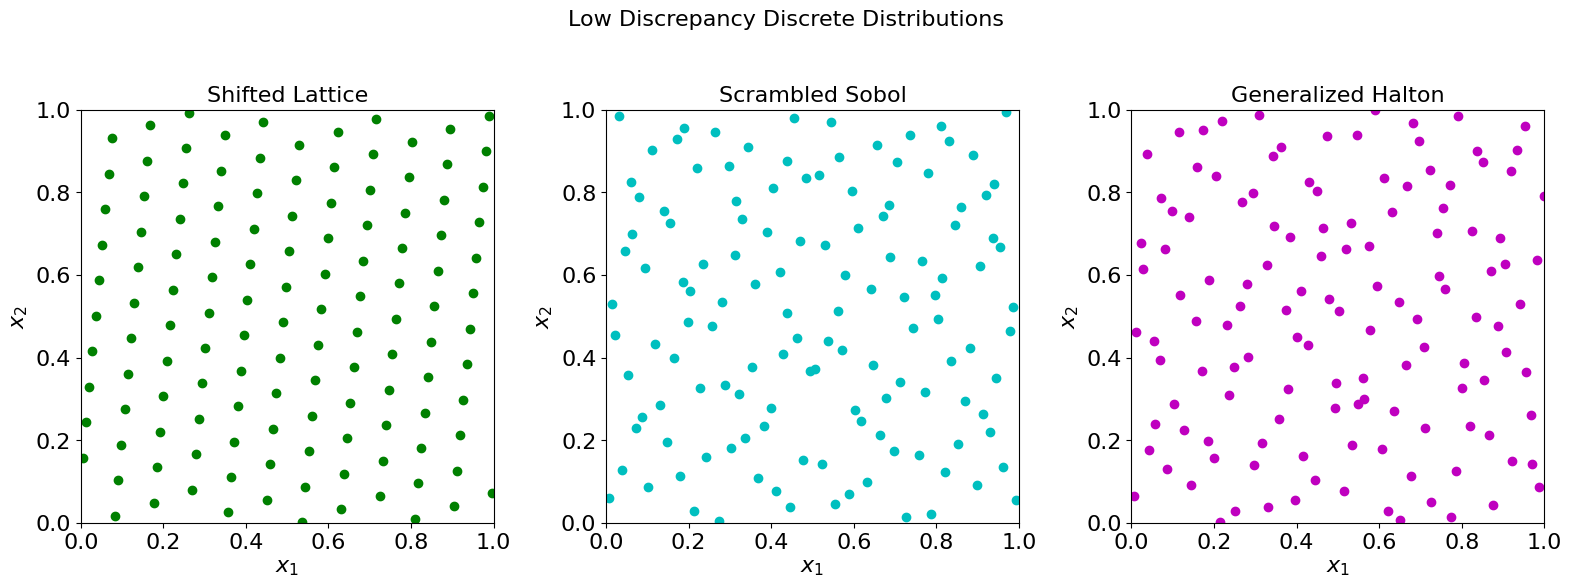

In [17]:
discrete_distribs = [
    Lattice(dimension=2, randomize=True, seed=7),
    Sobol(dimension=2, randomize=True, seed=7),
    Halton(dimension=2,seed=7)]
dd_names = ["Shifted Lattice", "Scrambled Sobol", "Generalized Halton", "Randomized Korobov"]
colors = ["g", "c", "m", "r"]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
for i, (dd_obj, color, dd_name) in \
        enumerate(zip(discrete_distribs, colors, dd_names)):
    samples = dd_obj.gen_samples(n)
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim([0, 1])
    ax[i].set_ylim([0, 1])
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("Low Discrepancy Discrete Distributions")
plt.tight_layout();

## Transform to the True Distribution
Transform samples from a few discrete distributions to mimic various measures

In [18]:
def plot_tm_transformed(tm_name, color, lim, measure, **kwargs):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
    i = 0
    # IID Distributions
    iid_distribs = [
        IIDStdUniform(dimension=2, seed=7),
        #IIDStdGaussian(dimension=2, seed=7)
    ]
    iid_names = [
        "IID $\\mathcal{U}\\,(0,1)^2$",
        "IID $\\mathcal{N}\\,(0,1)^2$"]
    for distrib, distrib_name in zip(iid_distribs, iid_names):
        measure_obj = measure(distrib, **kwargs)
        samples = measure_obj.gen_samples(n)
        ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
        i += 1
    # Quasi Random Distributions
    qrng_distribs = [
        Lattice(dimension=2, randomize=True, seed=7),
        Sobol(dimension=2, randomize=True, seed=7),
        Halton(dimension=2, randomize=True, seed=7)]
    qrng_names = ["Shifted Lattice",
                  "Scrambled Sobol",
                  "Randomized Halton"]
    for distrib, distrib_name in zip(qrng_distribs, qrng_names):
        measure_obj = measure(distrib, **kwargs)
        samples = measure_obj.gen_samples(n_min=0,n_max=n)
        ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
        i += 1
    # Plot Metas
    for i,distrib in enumerate(iid_distribs+qrng_distribs):
        ax[i].set_xlabel("$x_1$")
        if i==0:
            ax[i].set_ylabel("$x_2$")
        else:
            ax[i].set_yticks([])
        ax[i].set_xlim(lim)
        ax[i].set_ylim(lim)
        ax[i].set_aspect("equal")
        ax[i].set_title(type(distrib).__name__)
    fig.suptitle("Transformed to %s from..." % tm_name)
    plt.tight_layout()
    prefix = type(measure_obj).__name__;

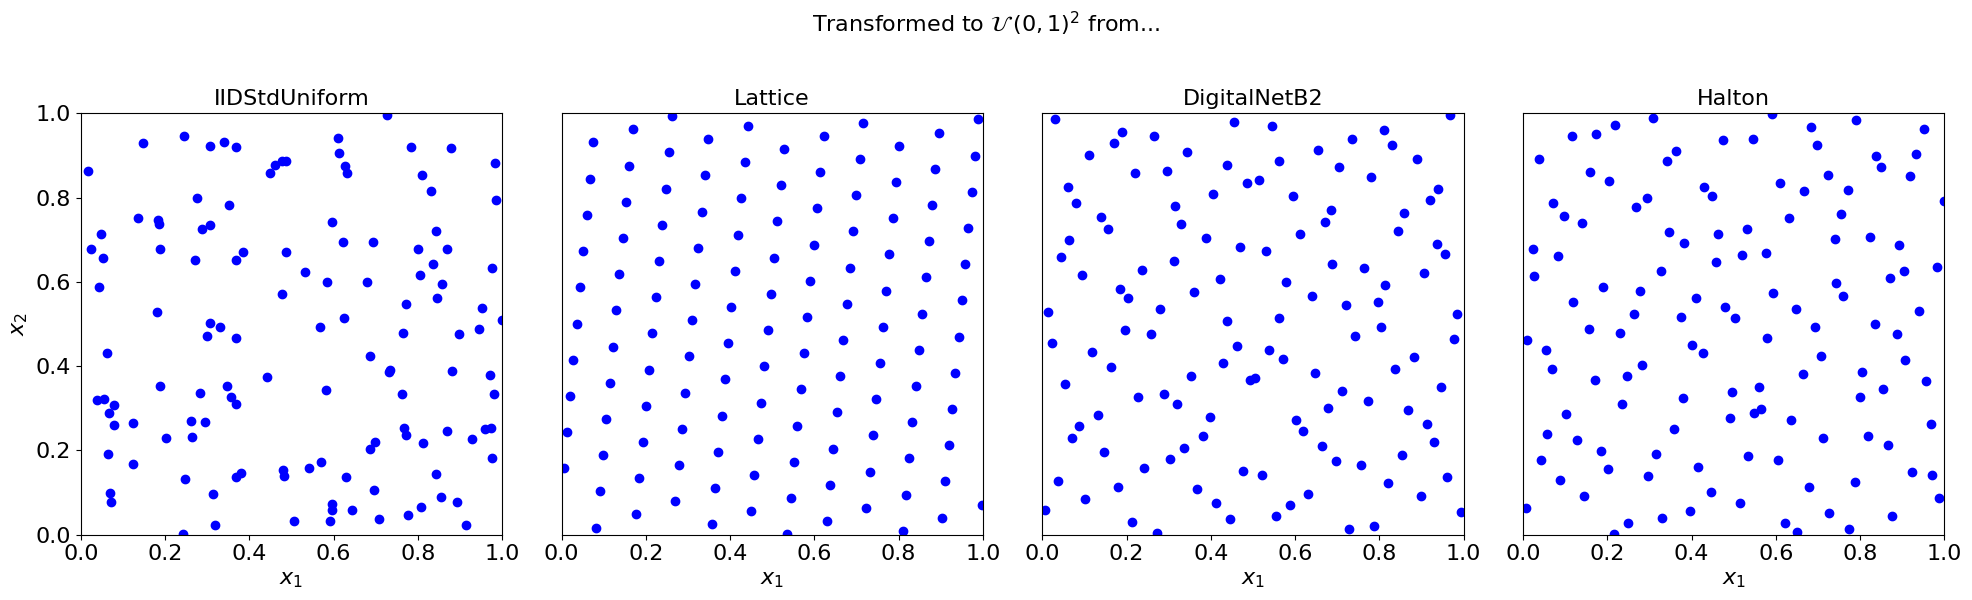

In [19]:
plot_tm_transformed("$\\mathcal{U}\\,(0,1)^2$","b",[0, 1],Uniform)

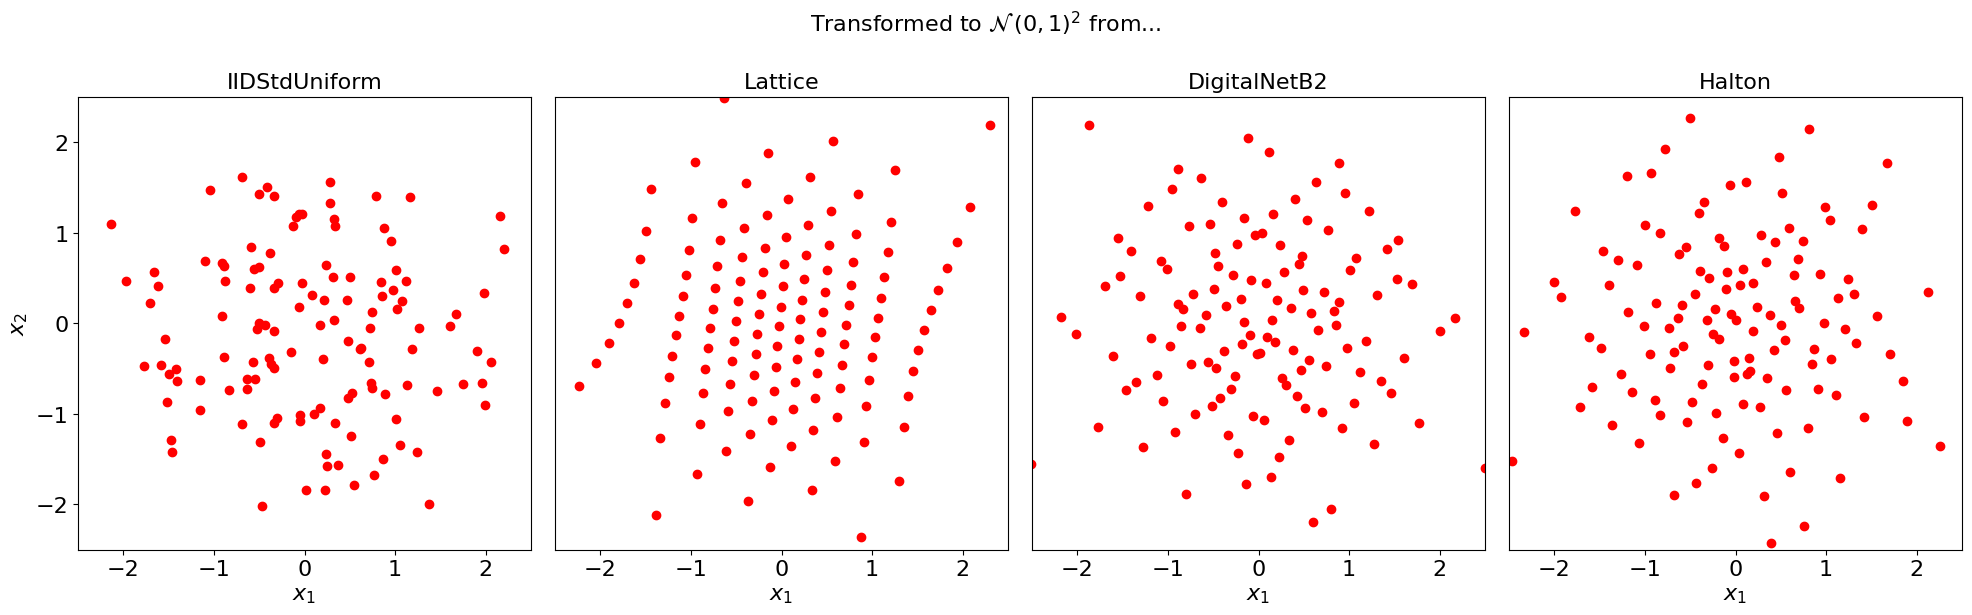

In [20]:
plot_tm_transformed("$\\mathcal{N}\\,(0,1)^2$","r",[-2.5, 2.5],Gaussian)

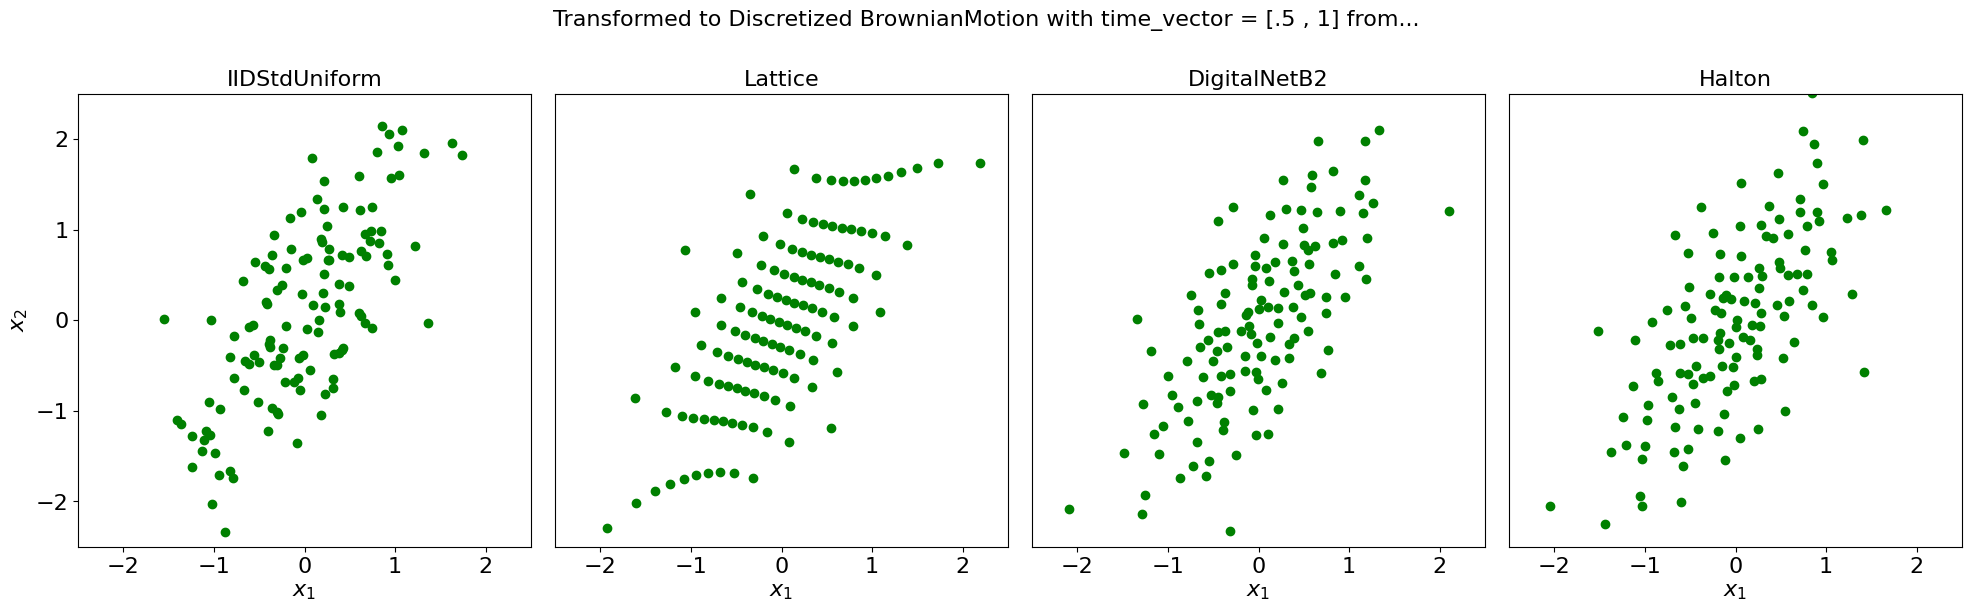

In [21]:
plot_tm_transformed("Discretized BrownianMotion with time_vector = [.5 , 1]",
                   "g",[-2.5, 2.5],BrownianMotion)

## Shift and Stretch the True Distribution
Transform Sobol sequences to mimic non-standard Uniform and Gaussian measures

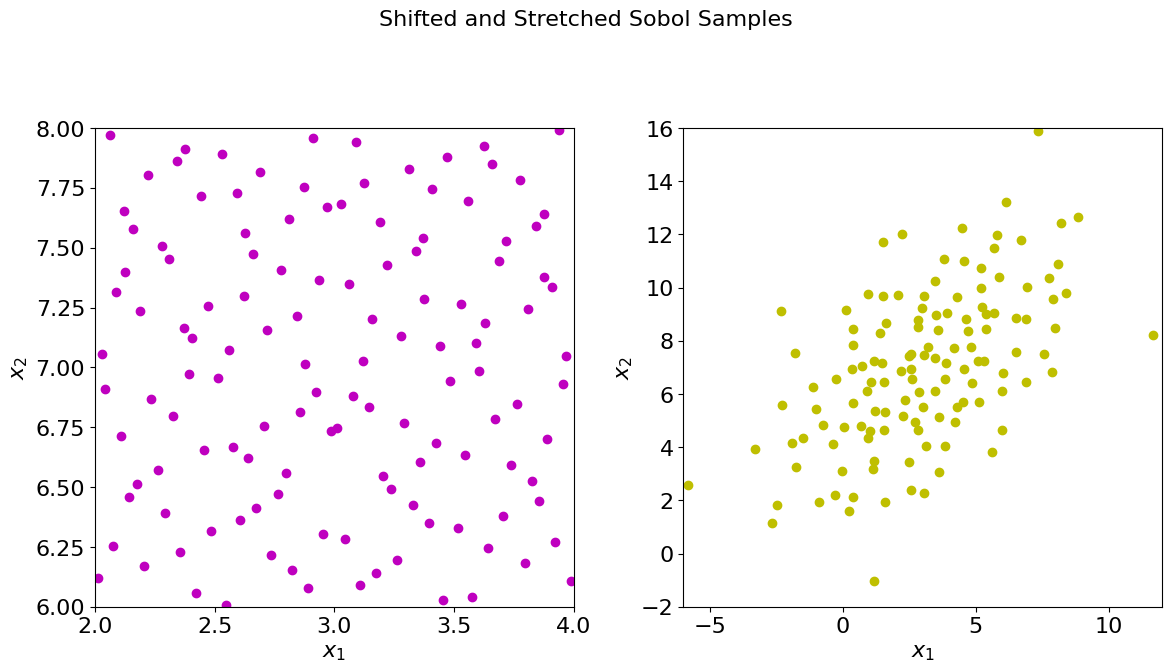

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
u1_a, u1_b = 2, 4
u2_a, u2_b = 6, 8
g1_mu, g1_var = 3, 9
g2_mu, g2_var = 7, 9
g_cov = 5
distribution = Sobol(dimension=2, randomize=True, seed=7)
uniform_measure = Uniform(distribution,lower_bound=[u1_a, u2_a],upper_bound=[u1_b, u2_b])
gaussian_measure = Gaussian(distribution,mean=[g1_mu, g2_mu],covariance=[[g1_var, g_cov],[g_cov,g2_var]])
# Generate Samples and Create Scatter Plots
for i, (measure, color) in enumerate(zip([uniform_measure, gaussian_measure], ["m", "y"])):
    samples = measure.gen_samples(n)
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
# Plot Metas
for i in range(2):
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_aspect("equal")
ax[0].set_xlim([u1_a, u1_b])
ax[0].set_ylim([u2_a, u2_b])
spread_g1 = ceil(3 * g1_var**.5)
spread_g2 = ceil(3 * g2_var**.5)
ax[1].set_xlim([g1_mu - spread_g1, g1_mu + spread_g1])
ax[1].set_ylim([g2_mu - spread_g2, g2_mu + spread_g2])
fig.suptitle("Shifted and Stretched Sobol Samples")
plt.tight_layout();

## Plots samples on a 2D Keister function

In [23]:
abs_tol = .3
integrand = Keister(IIDStdUniform(dimension=2, seed=7))
solution,data = CubMCCLT(integrand,abs_tol=abs_tol,rel_tol=0,n_init=16).integrate()
print(data)

Data (Data)
    solution        1.680
    bound_low       1.222
    bound_high      2.137
    bound_diff      0.915
    n_total         63
    time_integrate  0.001
CubMCCLT (AbstractStoppingCriterion)
    abs_tol         0.300
    rel_tol         0
    n_init          2^(4)
    n_limit         2^(30)
    inflate         1.200
    alpha           0.010
Keister (AbstractIntegrand)
Gaussian (AbstractTrueMeasure)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
IIDStdUniform (AbstractIIDDiscreteDistribution)
    d               2^(1)
    replications    1
    entropy         7


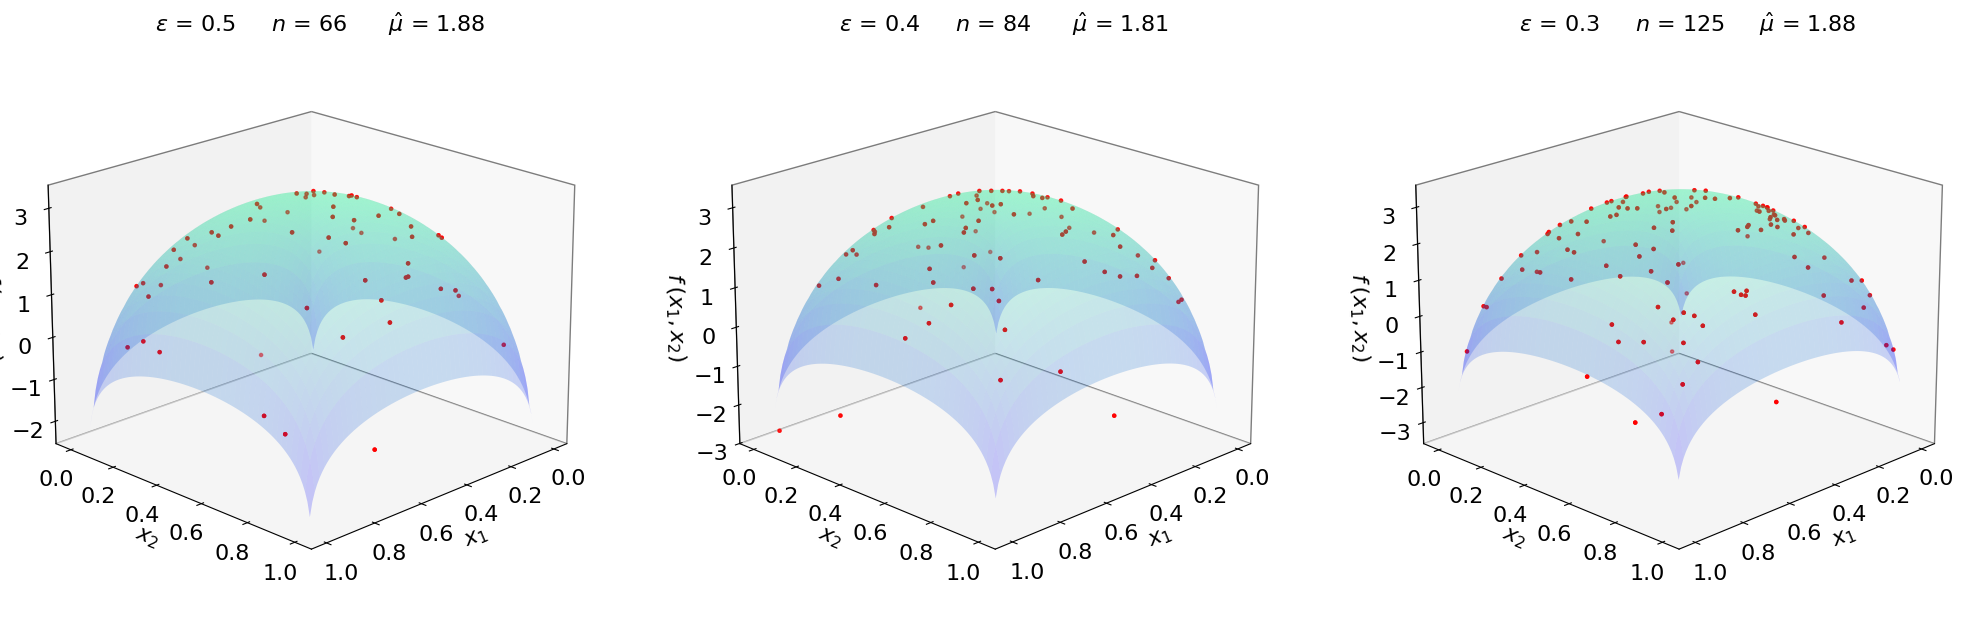

In [24]:
# Constants based on running the above CLT Example
eps_list = [.5, .4, .3]
n_list = [66, 84, 125]
mu_hat_list = [1.8757, 1.8057, 1.8829]
# Function Points
nx, ny = (99, 99)
points_fun = zeros((nx * ny, 3))
x = arange(.01, 1, .01)
y = arange(.01, 1, .01)
x_2d, y_2d = meshgrid(x, y)
points_fun[:, 0] = x_2d.flatten()
points_fun[:, 1] = y_2d.flatten()
points_fun[:, 2] = integrand.f(points_fun[:, :2]).squeeze()
x_surf = points_fun[:, 0].reshape((nx, ny))
y_surf = points_fun[:, 1].reshape((nx, ny))
z_surf = points_fun[:, 2].reshape((nx, ny))
# 3D Plot
fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")
for idx, ax in enumerate([ax1, ax2, ax3]):
    n = n_list[idx]
    epsilon = eps_list[idx]
    mu = mu_hat_list[idx]
    # Surface
    ax.plot_surface(x_surf, y_surf, z_surf, cmap="winter", alpha=.2)
    # Scatters
    points = zeros((n, 3))
    points[:, :2] = integrand.discrete_distrib.gen_samples(n)
    points[:, 2] = integrand.f(points[:, :2]).squeeze()
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    ax.set_title("\t$\\epsilon$ = %-7.1f $n$ = %-7d $\\hat{\\mu}$ = %-7.2f "
                 % (epsilon, n, mu), fontdict={"fontsize": 16})
    # axis metas
    n *= 2
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor("black")
    ax.yaxis.pane.set_edgecolor("black")
    ax.set_xlabel("$x_1$", fontdict={"fontsize": 16})
    ax.set_ylabel("$x_2$", fontdict={"fontsize": 16})
    ax.set_zlabel("$f\\:(x_1,x_2)$", fontdict={"fontsize": 16})
    ax.view_init(20, 45);